# Improving Computer Vision Accuracy using Convolutions

In the previous lessons you saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. You experimented with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

# Why we use Convolution ?
For better our result.

In [12]:
#import library
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [13]:
dataset=tf.keras.datasets.mnist
(train_x,train_label),(test_x,test_label)=dataset.load_data()

5


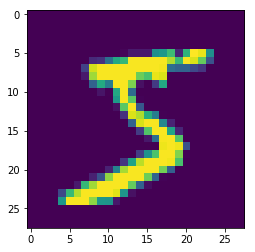

In [14]:
plt.imshow(train_x[0])
print(train_label[0])

In [15]:
#reshape
train_x=train_x.reshape(60000,28,28,1)
test_x=test_x.reshape(10000,28,28,1)

In [16]:
#normalize dataset
train_x=train_x/255.0
test_x=test_x/255.0

In [17]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
          print("\nReached 99% accuracy so cancelling training!")
          self.model.stop_training = True
            
callback=myCallback()

In [18]:
model=tf.keras.models.Sequential([
                                 tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(10,activation='softmax')
                                 ])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [20]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
result=model.fit(train_x,train_label,epochs=5,callbacks=[callback])

Epoch 1/5
60000/60000 [==============================] - 59s 977us/sample - loss: 0.1192 - acc: 0.9642
Epoch 2/5
60000/60000 [==============================] - 50s 834us/sample - loss: 0.0408 - acc: 0.9875
Epoch 3/5
59968/60000 [============================>.] - ETA: 0s - loss: 0.0284 - acc: 0.9911
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 48s 804us/sample - loss: 0.0284 - acc: 0.9911


In [21]:
accuracy=result.history['acc']
print("Our train  accuracy = ",accuracy[0]*100,"%")

Our train  accuracy =  96.41500115394592 %


In [22]:
loss,accuracy=model.evaluate(test_x,test_label)
print("Our test  accuracy = ",accuracy*100,"%")

10000/10000 [==============================] - 2s 226us/sample - loss: 0.0306 - acc: 0.9902
Our test  accuracy =  99.01999831199646 %


In [23]:
classifications=model.predict(test_x)

In [24]:
for i in range(12):
    print("Prediction for ",i," images |",np.argmax(classifications[i]))
    print("Acutal for ",i," images     |",test_label[i])
    print("")

Prediction for  0  images | 7
Acutal for  0  images     | 7

Prediction for  1  images | 2
Acutal for  1  images     | 2

Prediction for  2  images | 1
Acutal for  2  images     | 1

Prediction for  3  images | 0
Acutal for  3  images     | 0

Prediction for  4  images | 4
Acutal for  4  images     | 4

Prediction for  5  images | 1
Acutal for  5  images     | 1

Prediction for  6  images | 4
Acutal for  6  images     | 4

Prediction for  7  images | 9
Acutal for  7  images     | 9

Prediction for  8  images | 5
Acutal for  8  images     | 5

Prediction for  9  images | 9
Acutal for  9  images     | 9

Prediction for  10  images | 0
Acutal for  10  images     | 0

Prediction for  11  images | 6
Acutal for  11  images     | 6

